<a href="https://colab.research.google.com/github/safaa400/safaasalah_46-17921_ML_assignments/blob/main/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [101]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [102]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
from sklearn.preprocessing import StandardScaler

# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [103]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



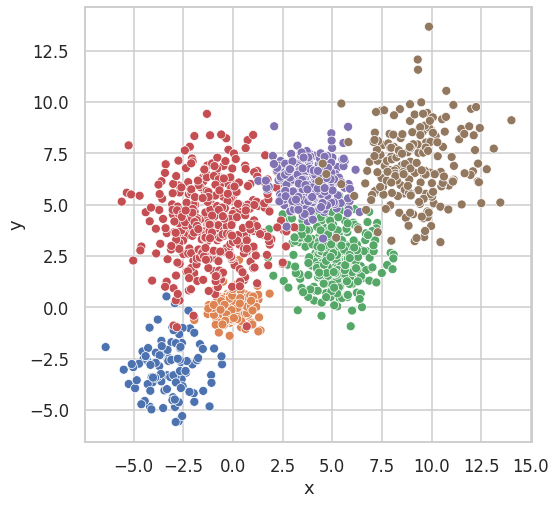

In [104]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
X_train,true_labels = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
# X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.show()
# display_cluster(X_train)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

SSE_values [36120.55102041719, 16716.697637160847, 12094.797074229678, 7812.040522678248, 5600.191496687573] 
 k_values [1, 2, 3, 4, 5]


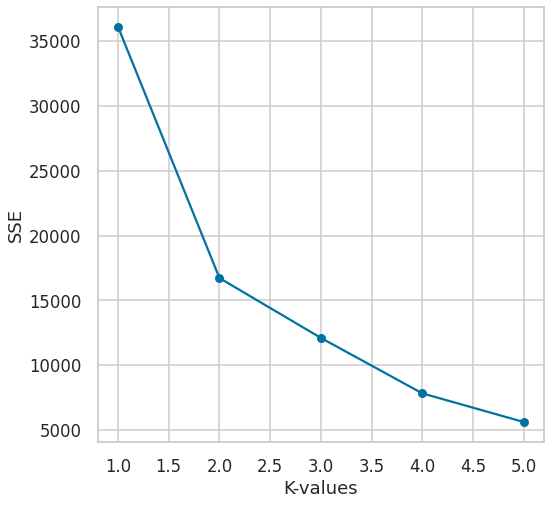

In [105]:
# k_means_4 = KMeans(n_clusters=4, random_state=4).fit(X_train)
def find_best_clusters(df, maximum_K):
    
    SSE_values = []
    k_values = []
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        SSE_values.append(kmeans_model.inertia_)

        k_values.append(k)
    
    return SSE_values,k_values
SSE_values, k_values=find_best_clusters(X_train,6)
print('SSE_values', SSE_values,'\n','k_values',k_values)
plt.plot(k_values, SSE_values, marker='o')
plt.xlabel("K-values")
plt.ylabel("SSE")
plt.show()

### Using the elbow method , k=4 is the optimal number of clusters 

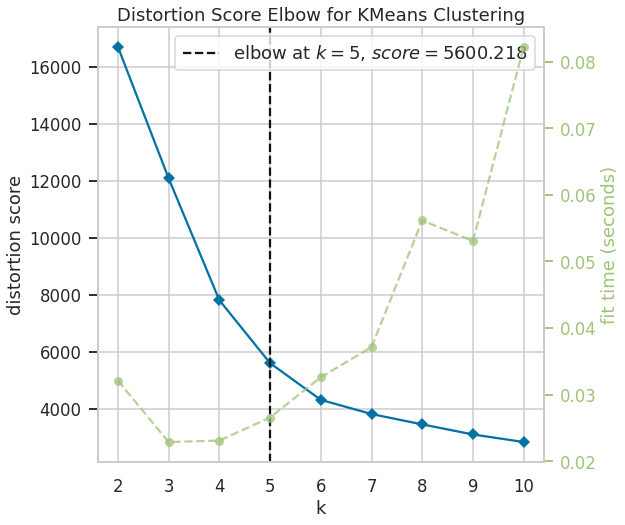

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_train)    
elb_visualizer.show()  

silhouette_scores [0.4751544541991239, 0.43631793714185435, 0.4628725400351352, 0.48100602217073096] 
 k_values [2, 3, 4, 5]


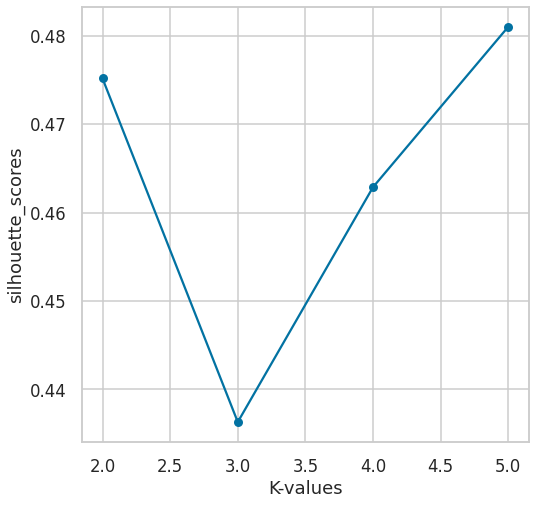

In [107]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(2, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train,6)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

Using the silhouette method , k=5 is the optimal number of clusters 

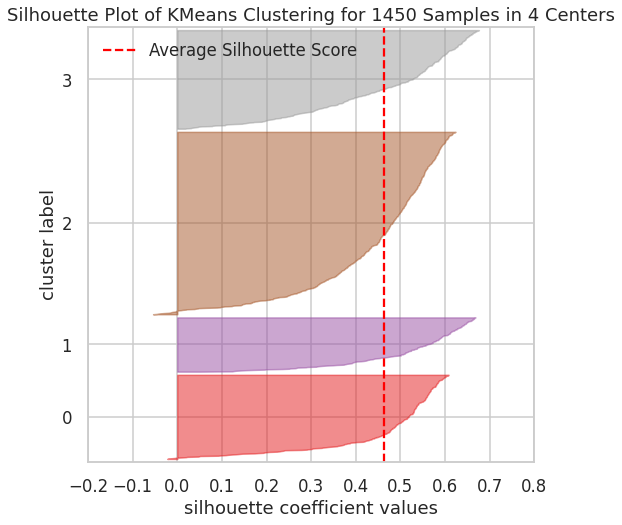

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1450 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [108]:
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X_train)    
sil_visualizer.show()

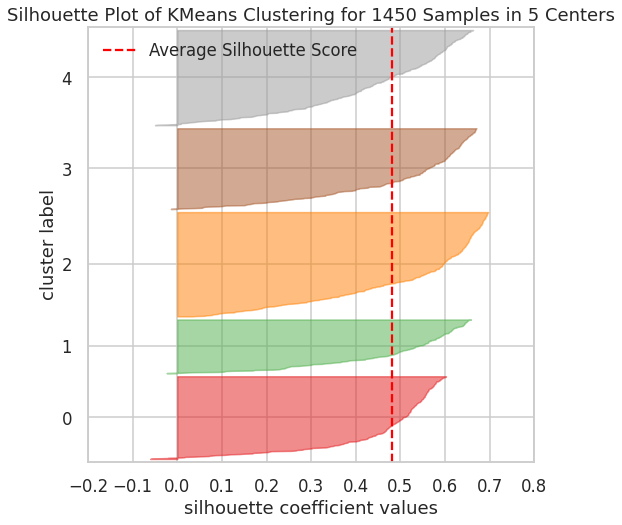

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1450 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [109]:
model_4clust = KMeans(n_clusters = 5, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X_train)    
sil_visualizer.show()

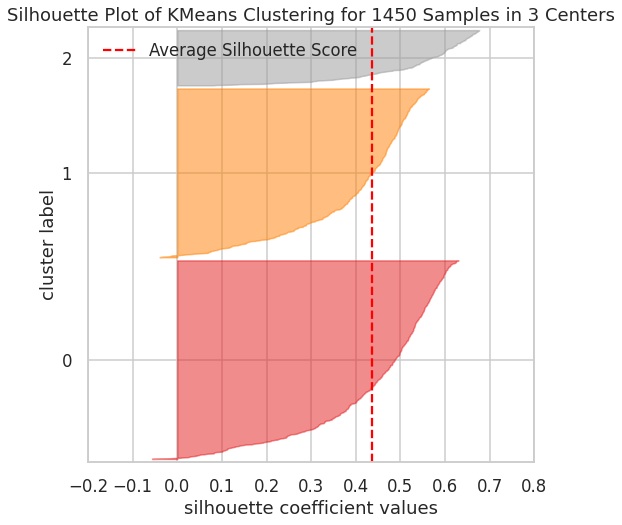

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1450 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [110]:
model_4clust = KMeans(n_clusters =3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X_train)    
sil_visualizer.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [111]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch




## linkage 

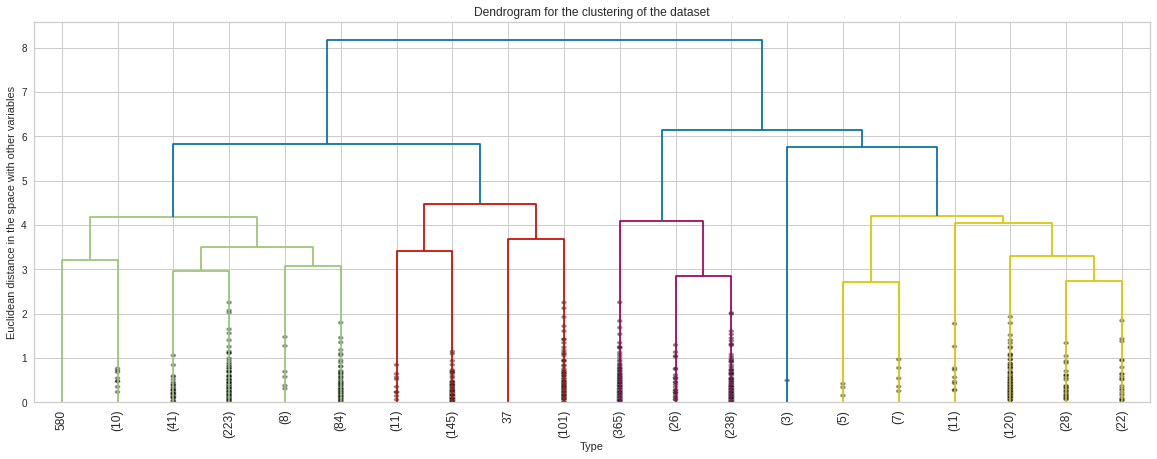

In [13]:
# Average Linkage - Average Distance between all points
Z = sch.linkage(X_train, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True # to get a distribution impression in truncated branches 
)
plt.title('Dendrogram for the clustering of the dataset')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()


In [14]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 ... 0 0 0]
{0: 825, 1: 625}


In [15]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.4716908069861964


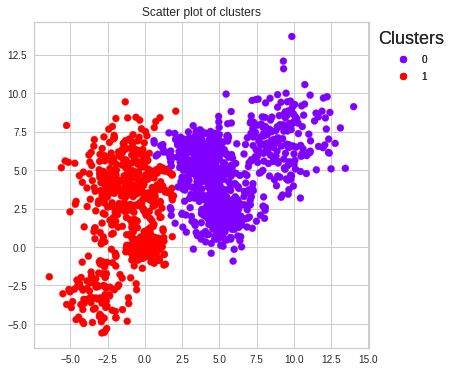

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()



---



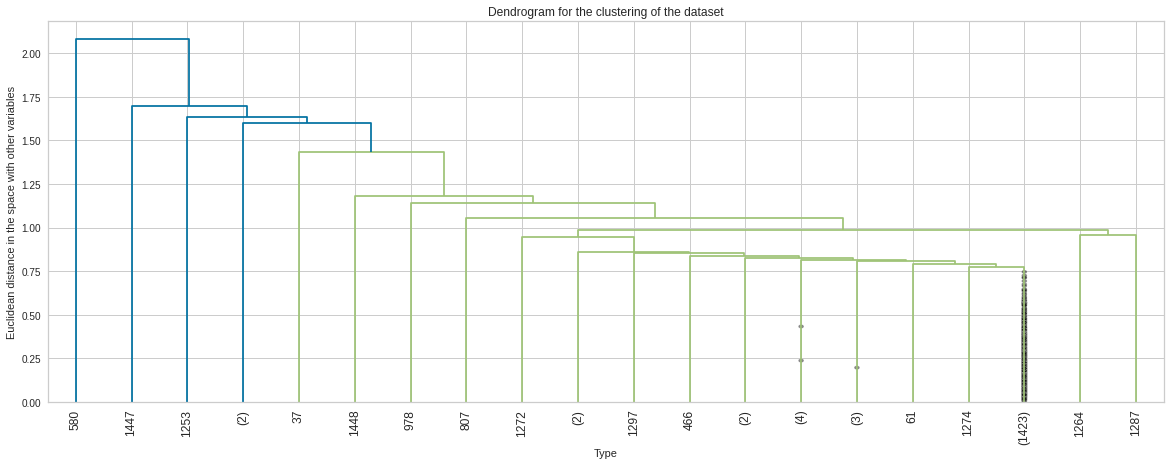

In [17]:
# Single linkage 

Z = sch.linkage(X_train, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    )
plt.title('Dendrogram for the clustering of the dataset')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')
plt.show()

In [18]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'single')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[0 0 0 ... 0 0 0]
{0: 1449, 1: 1}


In [19]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.3218066204847175


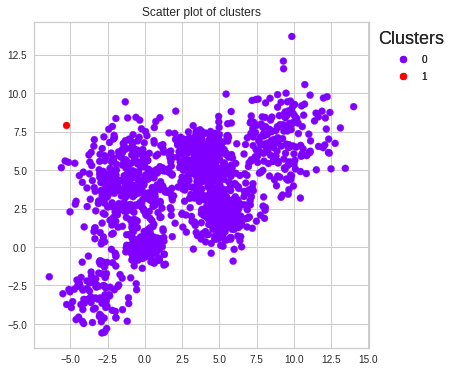

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()



---



From the above linkage approaches, apparently the average linkage is much better than the single one . 

In [21]:
model1_A = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model1_B = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model1_C = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model1_D = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average',distance_threshold=0.05)
model1_E = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average',distance_threshold=0.7)
model1_F = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.3)
model1_G = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=1)
model1_H = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.01)


clus_A = model1_A.fit(X_train)
clus_B = model1_B.fit(X_train)
clus_C = model1_C.fit(X_train)
clus_D = model1_D.fit(X_train)
clus_E = model1_E.fit(X_train)
clus_F = model1_F.fit(X_train)
clus_G= model1_F.fit(X_train)
clus_H= model1_F.fit(X_train)


In [22]:
print('Output Clusters from model A are')
pred1 = clus_A.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model A')
print(silhouette_score(X_train,pred1))

Output Clusters from model A are
[1 1 1 ... 0 0 0]
{0: 825, 1: 625}
Silhouette Score for model A
0.4716908069861964


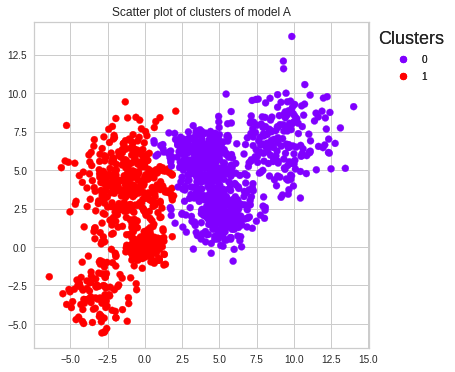

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model A')

plt.show()

In [24]:
print('Output Clusters from model B are')
pred1 = clus_B.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model B')
print(silhouette_score(X_train,pred1))

Output Clusters from model B are
[0 0 0 ... 1 1 1]
{0: 644, 1: 806}
Silhouette Score for model B
0.46762361386512785


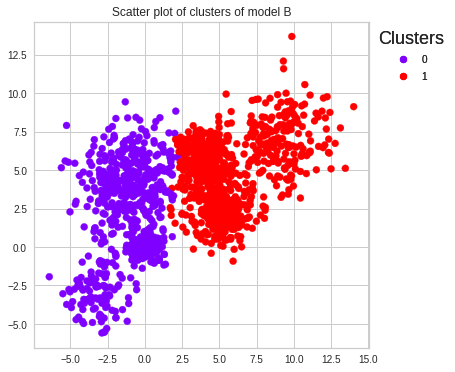

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model B')

plt.show()

In [26]:
print('Output Clusters from model C are')
pred1 = clus_C.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model C')
print(silhouette_score(X_train,pred1))

Output Clusters from model C are
[0 0 0 ... 1 1 1]
{0: 172, 1: 1278}
Silhouette Score for model C
0.35251834131557364


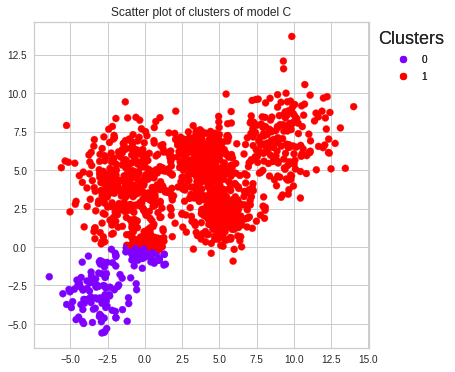

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model C')

plt.show()

In [28]:
print('Output Clusters from model D are')
pred1 = clus_D.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model D')
print(silhouette_score(X_train,pred1))

Output Clusters from model D are
[1192 1093  844 ...  153   93  261]
{0: 2, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 3, 15: 3, 16: 2, 17: 2, 18: 2, 19: 2, 20: 3, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 1, 40: 2, 41: 2, 42: 1, 43: 2, 44: 2, 45: 2, 46: 2, 47: 2, 48: 1, 49: 2, 50: 2, 51: 1, 52: 1, 53: 2, 54: 2, 55: 3, 56: 2, 57: 2, 58: 1, 59: 2, 60: 2, 61: 1, 62: 1, 63: 2, 64: 2, 65: 2, 66: 2, 67: 1, 68: 2, 69: 1, 70: 2, 71: 2, 72: 2, 73: 2, 74: 2, 75: 1, 76: 2, 77: 2, 78: 2, 79: 1, 80: 1, 81: 2, 82: 1, 83: 2, 84: 2, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 2, 93: 1, 94: 1, 95: 2, 96: 1, 97: 1, 98: 1, 99: 1, 100: 2, 101: 1, 102: 2, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 2, 109: 2, 110: 1, 111: 1, 112: 2, 113: 1, 114: 1, 115: 2, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 2, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 2, 128: 2, 129: 1, 

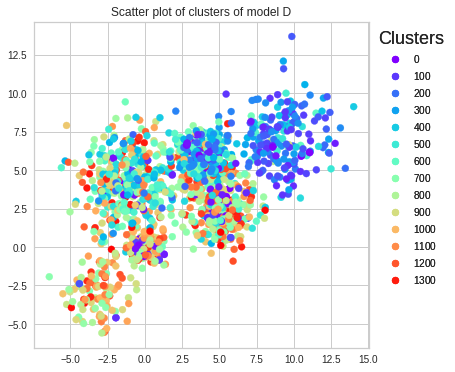

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model D')

plt.show()

In [30]:
print('Output Clusters from model E are')
pred1 = clus_E.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model E')
print(silhouette_score(X_train,pred1))

Output Clusters from model E are
[252  70 111 ... 160 195 109]
{0: 3, 1: 7, 2: 17, 3: 19, 4: 3, 5: 9, 6: 10, 7: 19, 8: 8, 9: 3, 10: 5, 11: 7, 12: 3, 13: 4, 14: 6, 15: 2, 16: 22, 17: 6, 18: 5, 19: 4, 20: 4, 21: 3, 22: 2, 23: 13, 24: 10, 25: 12, 26: 2, 27: 5, 28: 8, 29: 5, 30: 12, 31: 12, 32: 3, 33: 18, 34: 2, 35: 9, 36: 7, 37: 2, 38: 10, 39: 4, 40: 4, 41: 7, 42: 9, 43: 12, 44: 16, 45: 5, 46: 4, 47: 2, 48: 11, 49: 15, 50: 5, 51: 4, 52: 4, 53: 5, 54: 12, 55: 5, 56: 6, 57: 5, 58: 2, 59: 6, 60: 2, 61: 12, 62: 3, 63: 19, 64: 19, 65: 6, 66: 3, 67: 3, 68: 2, 69: 6, 70: 3, 71: 13, 72: 2, 73: 18, 74: 5, 75: 8, 76: 6, 77: 4, 78: 11, 79: 4, 80: 4, 81: 6, 82: 25, 83: 2, 84: 21, 85: 9, 86: 3, 87: 3, 88: 5, 89: 9, 90: 4, 91: 5, 92: 4, 93: 3, 94: 2, 95: 2, 96: 8, 97: 6, 98: 2, 99: 24, 100: 28, 101: 3, 102: 14, 103: 3, 104: 4, 105: 9, 106: 3, 107: 6, 108: 26, 109: 7, 110: 2, 111: 4, 112: 4, 113: 8, 114: 4, 115: 5, 116: 3, 117: 3, 118: 2, 119: 6, 120: 4, 121: 12, 122: 7, 123: 8, 124: 9, 125: 2, 126: 4, 

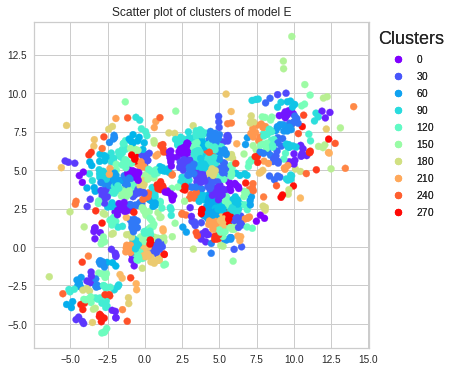

In [31]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model E')

plt.show()

In [32]:
print('Output Clusters from model F are')
pred1 = clus_F.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model F')
print(silhouette_score(X_train,pred1))

Output Clusters from model F are
[2 2 2 ... 1 1 1]
{0: 356, 1: 922, 2: 132, 3: 24, 4: 16}
Silhouette Score for model F
0.24927357773894548


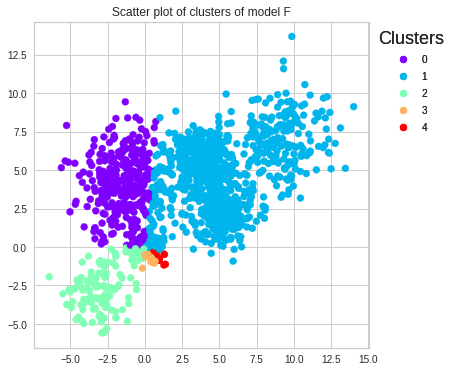

In [33]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model F')

plt.show()

In [34]:
print('Output Clusters from model G are')
pred1 = clus_G.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model G')
print(silhouette_score(X_train,pred1))

Output Clusters from model G are
[2 2 2 ... 1 1 1]
{0: 356, 1: 922, 2: 132, 3: 24, 4: 16}
Silhouette Score for model G
0.24927357773894548


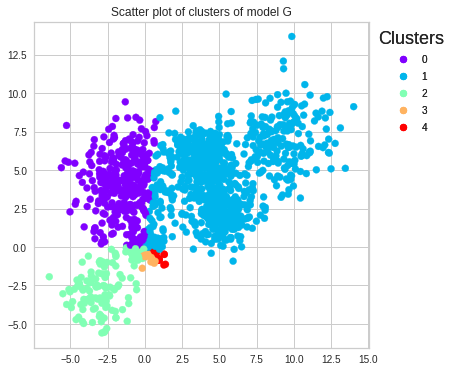

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model G')

plt.show()

In [36]:
print('Output Clusters from model H are')
pred1 = clus_H.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model H')
print(silhouette_score(X_train,pred1))

Output Clusters from model H are
[2 2 2 ... 1 1 1]
{0: 356, 1: 922, 2: 132, 3: 24, 4: 16}
Silhouette Score for model H
0.24927357773894548


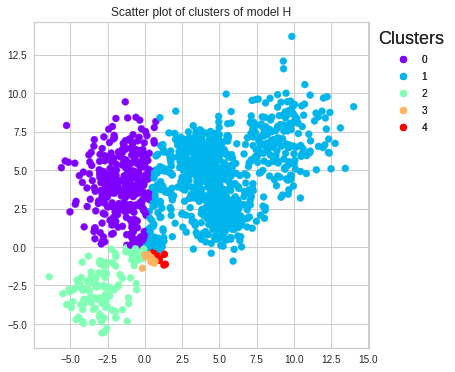

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model H')

plt.show()

## notes :
- optimal number of clusters is 2 in model A  where n_clusters=2, affinity='euclidean', linkage='average', and the resuting  silhouette_score is  0.4716908069861964 

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [38]:
from sklearn.cluster import DBSCAN
def all_equal2(iterator):
    return len(set(iterator)) <= 1
EPS=np.arange(0.1,3.1,0.1).tolist()
Min_samples=np.arange(5,26,5).tolist()
silhouette_scores=[]
for i in range(len(EPS)):
  for j in range(len(Min_samples)):
    dbscan = DBSCAN(eps =EPS[i],min_samples =Min_samples[j]).fit(X_train)
    print('___________________________________________________________________________________________')
    print('Output Clusters ','eps=',EPS[i],'min_samples=',Min_samples[j])
    pred1 = dbscan.labels_
# Frequency count of the Output clusters
    unique, counts = np.unique(pred1, return_counts=True)
    print(dict(zip(unique, counts)))
    # Silhouette Score
    print('Silhouette Score')
    flag=all_equal2(pred1)
    if flag==False:
      x=silhouette_score(X_train,pred1)
      print(x)
      silhouette_scores.append(x)
    else:
      print('just 1 cluster label ,cannot calculate silhouette_score')

print('silhouette_scores list',silhouette_scores)







___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 5
{-1: 1380, 0: 9, 1: 7, 2: 5, 3: 7, 4: 9, 5: 6, 6: 5, 7: 5, 8: 5, 9: 7, 10: 5}
Silhouette Score
-0.5423348432605972
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 10
{-1: 1450}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 15
{-1: 1450}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output Clusters  eps= 0.1 min_samples= 20
{-1: 1450}
Silhouette Score
just 1 cluster label ,cannot calculate silhouette_score
___________________________________________________________________________________________
Output

[ 0  0  0 ... -1  0  0]
{-1: 1, 0: 1449}
Silhouette Score
0.4685207355522043


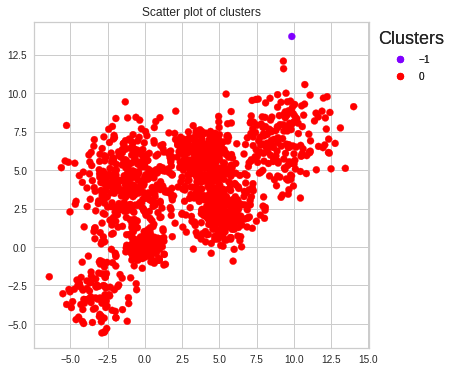

In [39]:
dbscan = DBSCAN(eps =3,min_samples =25).fit(X_train)
pred1 = dbscan.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score')
print(silhouette_score(X_train,pred1))
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

## Notes 
- optimal number of clusters is 2 , when eps= 3 and min_samples=25 ,with Silhouette Score
0.4685207355522043

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

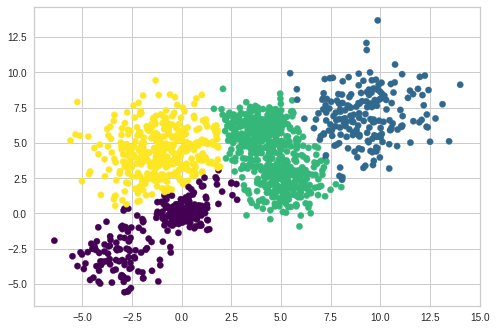

In [40]:
from sklearn.mixture import GaussianMixture
import pandas as pd
gm = GaussianMixture(n_components=4).fit(X_train)
pred = gm.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=pred, s=40, cmap='viridis')
probs = gm.predict_proba(X_train)


In [41]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

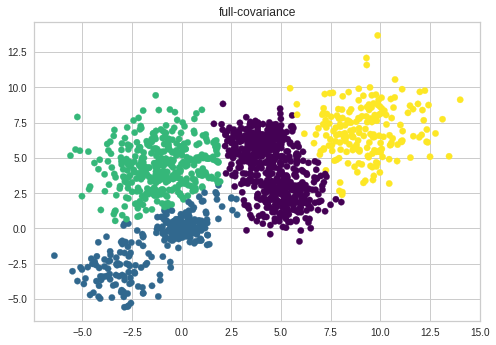

full-covariance probs [[0.    1.    0.    0.   ]
 [0.    0.988 0.012 0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.998 0.002 0.   ]
 [0.    0.999 0.001 0.   ]]


In [42]:
cov_lst=['full','tied','diag','spherical']
preds=[]
probs=[]
gmms=[]
for i in range(len(cov_lst)):
  gmm = GaussianMixture(n_components=4, covariance_type=cov_lst[i], random_state=42).fit(X_train)
  gmms.append(gmm)
  pred = gmm.predict(X_train)
  preds.append(pred)
  prob = gmm.predict_proba(X_train)
  probs.append(prob)
# print(gmms)

  # print(i, pred )
  # print(preds)
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[0], s=40, cmap='viridis')
plt.title('full-covariance')
plt.show()
print('full-covariance probs',probs[0][:5].round(3))

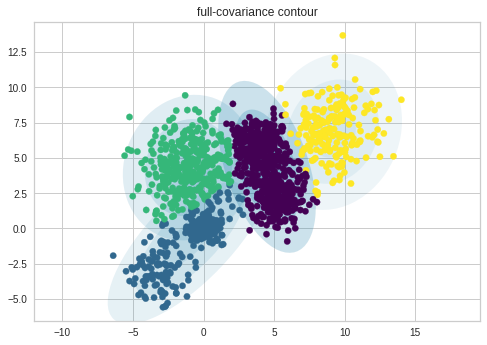

In [43]:
plot_gmm(gmms[0], X_train)
plt.title('full-covariance contour')
plt.show()


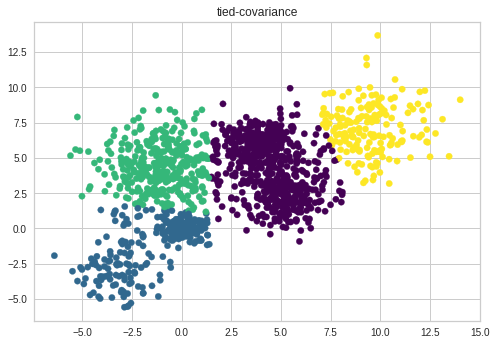

tied-covariance probs [[0.    0.998 0.002 0.   ]
 [0.    0.965 0.035 0.   ]
 [0.    0.998 0.002 0.   ]
 [0.    0.987 0.013 0.   ]
 [0.    0.994 0.006 0.   ]]


In [44]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[1], s=40, cmap='viridis')
plt.title('tied-covariance')
plt.show()
print('tied-covariance probs',probs[1][:5].round(3))

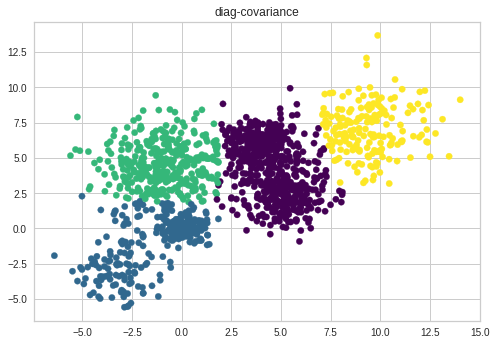

diag-covariance probs [[0.    0.998 0.002 0.   ]
 [0.    0.965 0.035 0.   ]
 [0.    0.998 0.002 0.   ]
 [0.    0.987 0.013 0.   ]
 [0.    0.994 0.006 0.   ]]


In [45]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[2], s=40, cmap='viridis')
plt.title('diag-covariance')
plt.show()
print('diag-covariance probs',probs[1][:5].round(3))

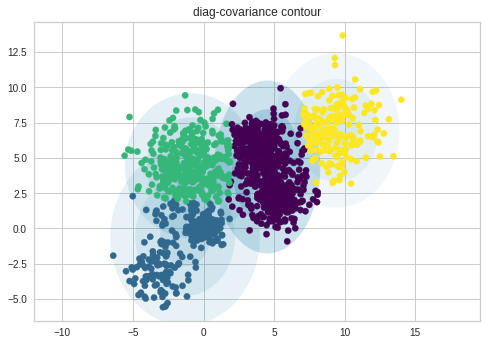

In [46]:
plot_gmm(gmms[2], X_train)
plt.title('diag-covariance contour')
plt.show()


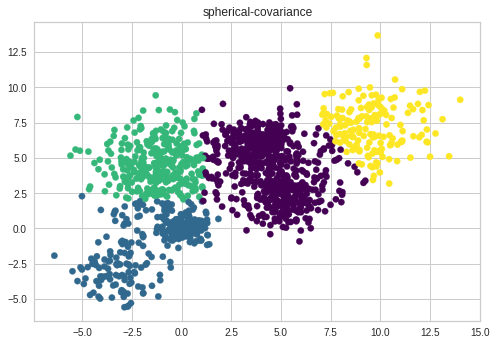

spherical-covariance probs [[0.    1.    0.    0.   ]
 [0.    0.997 0.002 0.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]]


In [47]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=preds[3], s=40, cmap='viridis')
plt.title('spherical-covariance')
plt.show()
print('spherical-covariance probs',probs[3][:5].round(3))

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [48]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X = iris_data.data 
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [49]:
df = pd.DataFrame(X, columns=iris_data.feature_names)
df['species'] = iris_data.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [50]:
X_train=df.iloc[:,[0,1,2,3]].values  

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

# Kmeans

- Elbow Method

SSE_values [681.3706, 152.3479517603579, 78.851441426146, 57.22847321428572, 46.446182051282065, 39.03998724608726] 
 k_values [1, 2, 3, 4, 5, 6]


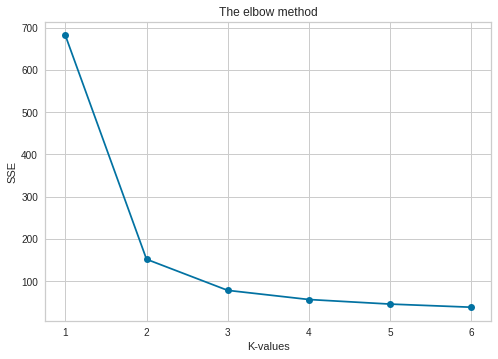

In [51]:
def find_best_clusters(df, maximum_K):
    
    SSE_values = []
    k_values = []
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        SSE_values.append(kmeans_model.inertia_)

        k_values.append(k)
    
    return SSE_values,k_values
X_train=df.iloc[:,[0,1,2,3]].values
SSE_values, k_values=find_best_clusters(X_train,7)
print('SSE_values', SSE_values,'\n','k_values',k_values)
plt.plot(k_values, SSE_values, marker='o')
plt.title('The elbow method')
plt.xlabel("K-values")
plt.ylabel("SSE")
plt.show()

- by using elbow method , k=3 is the optimal number of clusters

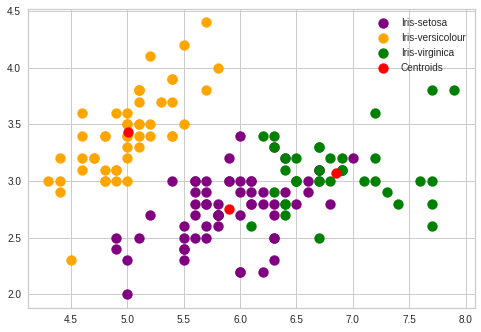

In [52]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_train)
#Visualising the clusters
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

- silhouette_scores

silhouette_scores [0.6810461692117462, 0.5528190123564095, 0.4974551890173751, 0.48874888709310566] 
 k_values [2, 3, 4, 5]


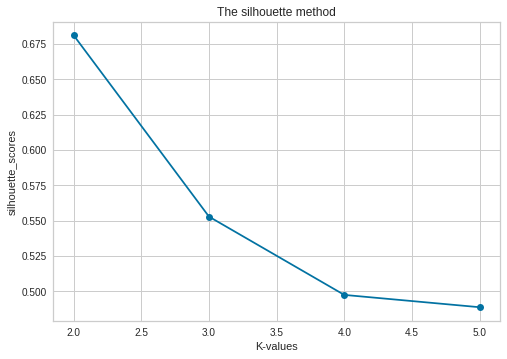

In [53]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(2, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train,6)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('The silhouette method')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

- By using silhouette_score method , k=2 is the optimal number of clusters 

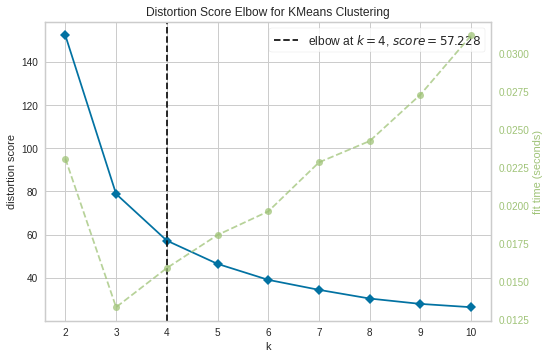

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_train)    
elb_visualizer.show()  

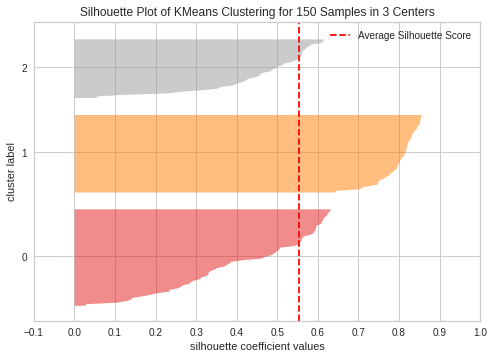

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
model_4clust = KMeans(n_clusters = 3, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X_train)    
sil_visualizer.show()

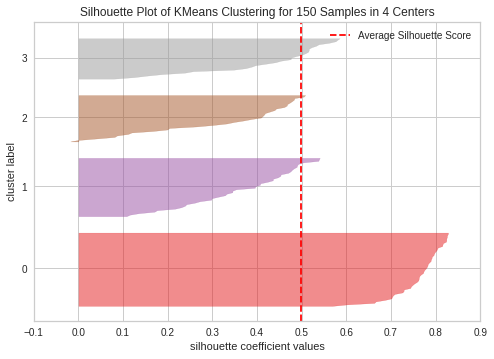

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(X_train)    
sil_visualizer.show()



---
## Hirarical clustering 


- linkage 

Text(0, 0.5, 'Euclidean distance in the space with other variables')

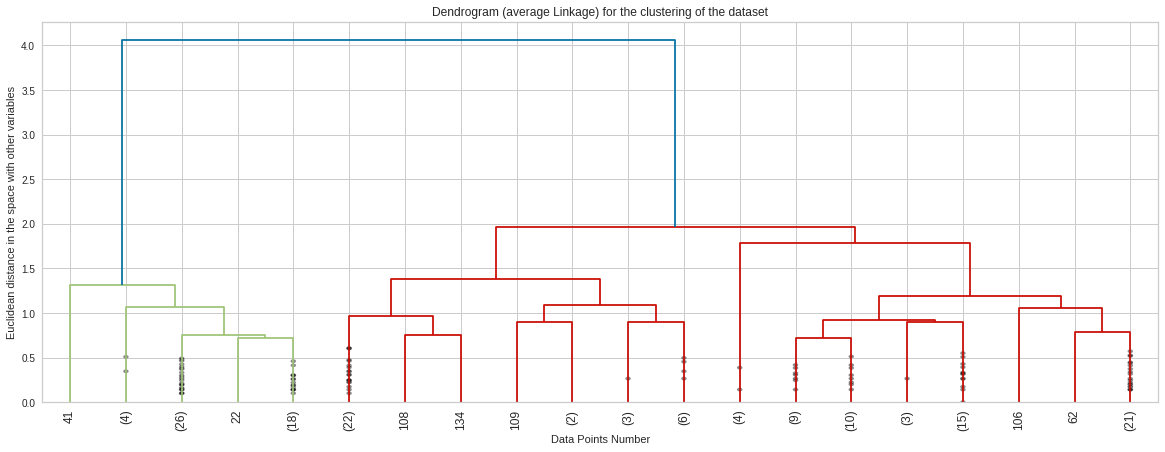

In [57]:
# Dendrogram (Average Linkage) 

Z = sch.linkage(X_train, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')
     

In [58]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}


In [59]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.6867350732769777


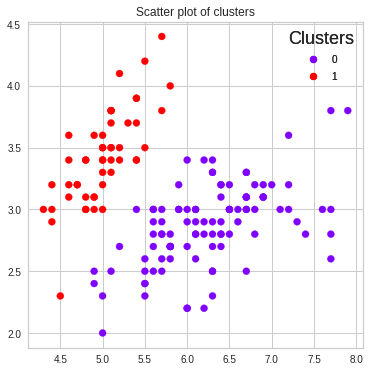

In [60]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

Text(0, 0.5, 'Euclidean distance in the space with other variables')

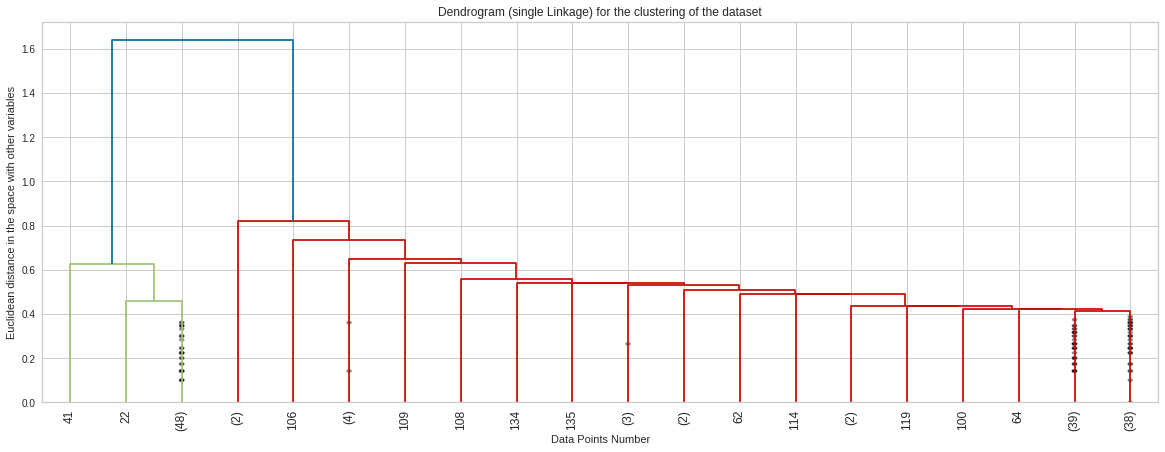

In [61]:
# Dendrogram (single Linkage) 

Z = sch.linkage(X_train, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')
     

In [62]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'single')
model_clt = cluster_H.fit(X_train)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}


In [63]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train,pred1))

Silhouette Score for 2 Clusters
0.6867350732769777


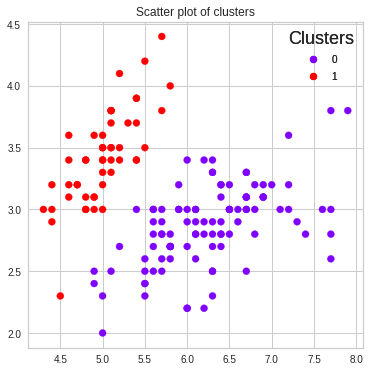

In [64]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

In [65]:
model1_A = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model1_B = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model1_C = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model1_D = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average',distance_threshold=0.05)
model1_E = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average',distance_threshold=0.7)
model1_F = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.3)
model1_G = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=1)
model1_H = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.01)


clus_A = model1_A.fit(X_train)
clus_B = model1_B.fit(X_train)
clus_C = model1_C.fit(X_train)
clus_D = model1_D.fit(X_train)
clus_E = model1_E.fit(X_train)
clus_F = model1_F.fit(X_train)
clus_G= model1_F.fit(X_train)
clus_H= model1_F.fit(X_train)


In [66]:
print('Output Clusters from model A are')
pred1 = clus_A.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model A')
print(silhouette_score(X_train,pred1))

Output Clusters from model A are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}
Silhouette Score for model A
0.6867350732769777


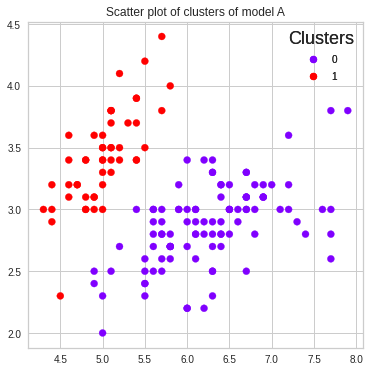

In [67]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model A')

plt.show()

In [68]:
print('Output Clusters from model B are')
pred1 = clus_B.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model B')
print(silhouette_score(X_train,pred1))

Output Clusters from model B are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}
Silhouette Score for model B
0.6867350732769777


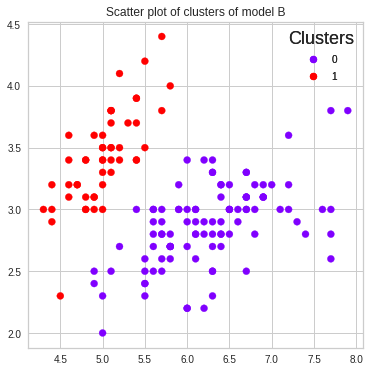

In [69]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model B')

plt.show()

In [70]:
print('Output Clusters from model C are')
pred1 = clus_C.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
print('Silhouette Score for model C')
print(silhouette_score(X_train,pred1))

Output Clusters from model C are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
{0: 50, 1: 100}
Silhouette Score for model C
0.6867350732769777


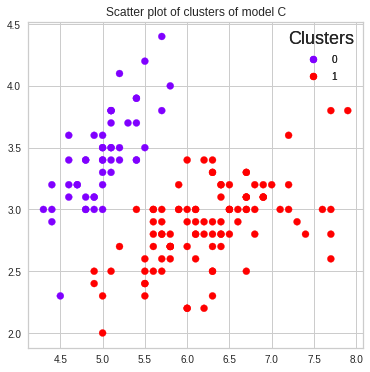

In [71]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model C')

plt.show()

In [72]:
print('Output Clusters from model D are')
pred1 = clus_D.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model D')
print(silhouette_score(X_train,pred1))

Output Clusters from model D are
[147 131 119 136 143  74 113 148 137 146 144  87 126  85 127  77 121 125
 103 142  89 106  75 116 129 122 108 135  73 141  81  91  71 105  93 133
 138  76 139 145 128  95 100 107  86 111 120  94  72  63  46  92 117 115
  52  79  97 140  88  35  36  67 132 130 101  64 118  98  96 112  48  31
 123  84 114  80  65 109 110  59  69  99 134  37 102  55  82  70  60  83
  47  53  50 104 124  66  78  42  32  56  27   0  49  51  40  90  39  45
  68  57  54  29  61  22  19  17  33  58  43  24  26  38  18  62  34  16
  28  15   8  23  44   7  21  10   3  41  25  30  14  13  12  11   0  20
   5   6   9   4   2   1]
{0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52

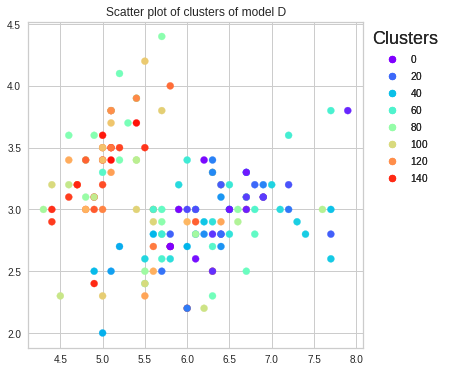

In [73]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model D')

plt.show()

In [74]:
print('Output Clusters from model E are')
pred1 = clus_E.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model E')
print(silhouette_score(X_train,pred1))

Output Clusters from model E are
[ 6  4  4  4  6 12  4  6 18  4  6  4  4 18 35 33 12  6 54  6 24  6 39 44
  4  4 44  6  6  4  4 24 10 10  4  6 24  6 18  6  6 47  4 44 41  4  6  4
  6  6 14  5 14 29 22  1  5  8 22 32  8  1 34 46 43 22 28 50 37 29  7  9
  2 46  9 22 14 48 46 51 29 29 50  2 28  5 14 37  1 29 42 46 50  8  1  1
  1  9 38  1 16 45 52  0 23 13 31 17 15 27 49  0  3 45 25 21  0 53 40 30
 19 45 13  2 19 11  2  7 23 11 17 36 23  2 20 26 21  0  7  3 19  3 45 19
 19  3  2 49 21  7]
{0: 4, 1: 7, 2: 6, 3: 4, 4: 15, 5: 3, 6: 16, 7: 4, 8: 3, 9: 3, 10: 2, 11: 2, 12: 2, 13: 2, 14: 4, 15: 1, 16: 1, 17: 2, 18: 3, 19: 5, 20: 1, 21: 3, 22: 4, 23: 3, 24: 3, 25: 1, 26: 1, 27: 1, 28: 2, 29: 5, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 2, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 3, 45: 4, 46: 4, 47: 1, 48: 1, 49: 2, 50: 3, 51: 1, 52: 1, 53: 1, 54: 1}
Silhouette Score for model E
0.23856894761398673


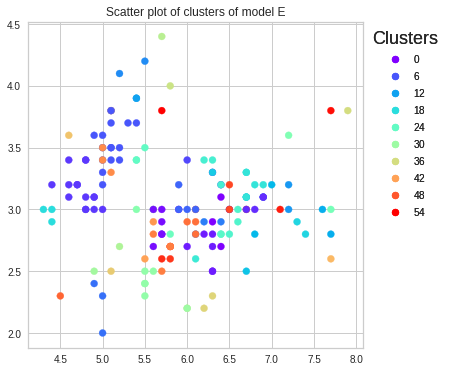

In [75]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model E')

plt.show()

In [76]:
print('Output Clusters from model F are')
pred1 = clus_F.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model F')
# print(silhouette_score(X_train,pred1))

Output Clusters from model F are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 150}
Silhouette Score for model F


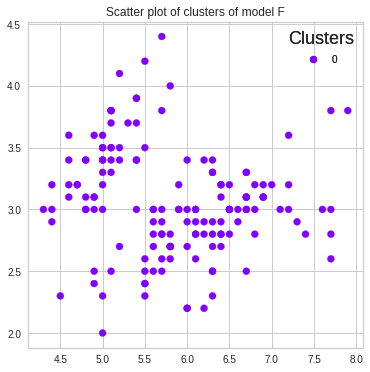

In [77]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model F')

plt.show()

In [78]:
print('Output Clusters from model G are')
pred1 = clus_G.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model G')
# print(silhouette_score(X_train,pred1))

Output Clusters from model G are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 150}
Silhouette Score for model G


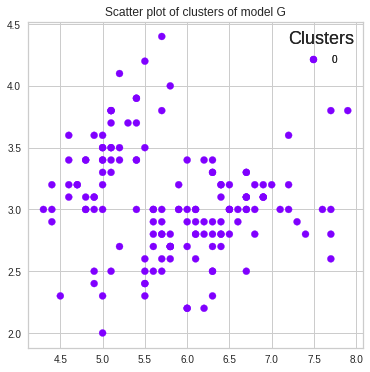

In [79]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train[:,0], X_train[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters of model G')

plt.show()



---

## Normalization & repeated steps

In [80]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
print(X_train[0:5])
print(X_train_normalized[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


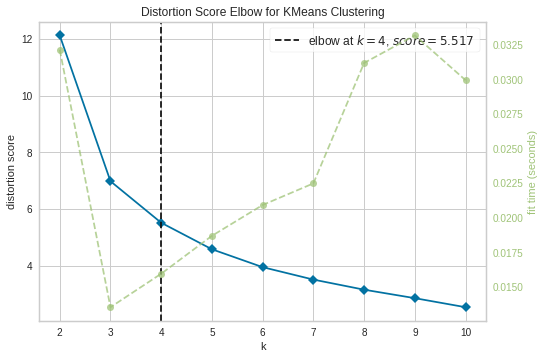

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_train_normalized)    
elb_visualizer.show()  

silhouette_scores [0.6300471284354711, 0.5047687565398589, 0.44506548804598545, 0.35257081557228126] 
 k_values [2, 3, 4, 5]


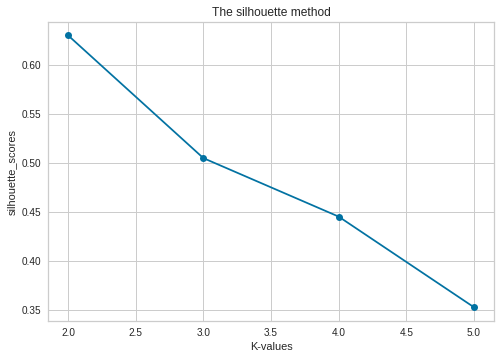

In [82]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(2, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train_normalized,6)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('The silhouette method')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

Text(0, 0.5, 'Euclidean distance in the space with other variables')

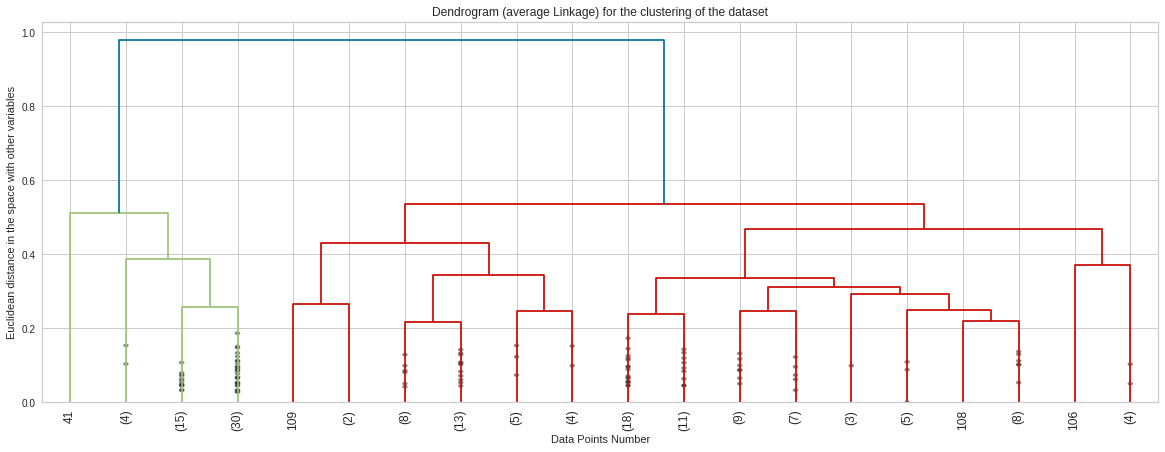

In [83]:
# Dendrogram (Average Linkage) 

Z = sch.linkage(X_train_normalized, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [84]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train_normalized)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}


In [85]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train_normalized,pred1))

Silhouette Score for 2 Clusters
0.6300471284354711


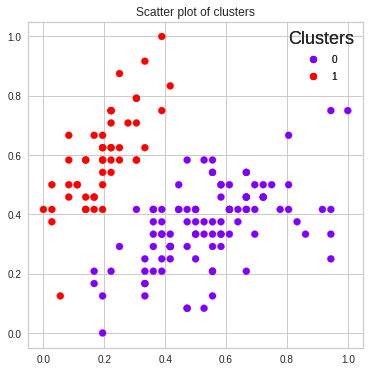

In [86]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train_normalized[:,0], X_train_normalized[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

Text(0, 0.5, 'Euclidean distance in the space with other variables')

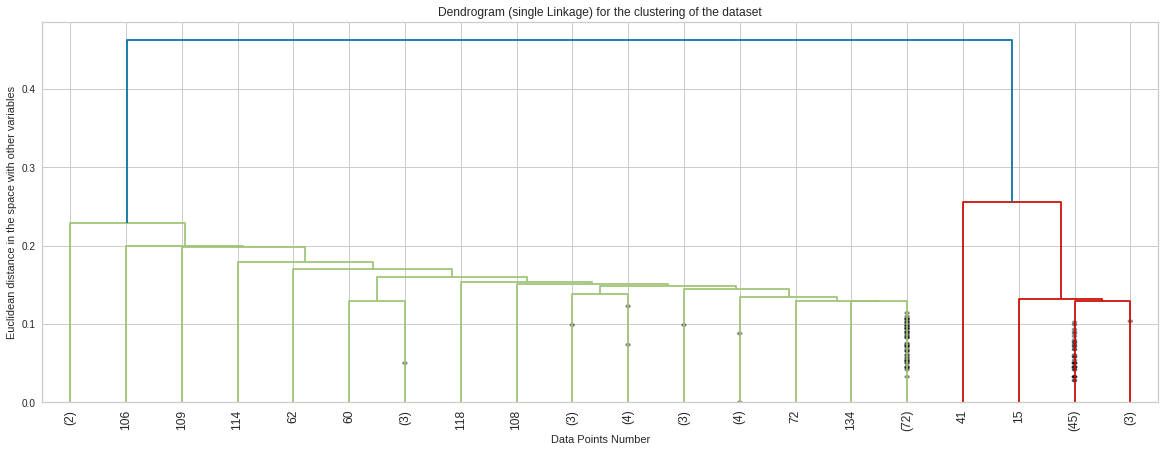

In [87]:
# Dendrogram (single Linkage) 

Z = sch.linkage(X_train_normalized, method = 'single')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (single Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [88]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'single')
model_clt = cluster_H.fit(X_train_normalized)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
{0: 50, 1: 100}


In [89]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train_normalized,pred1))

Silhouette Score for 2 Clusters
0.6300471284354711


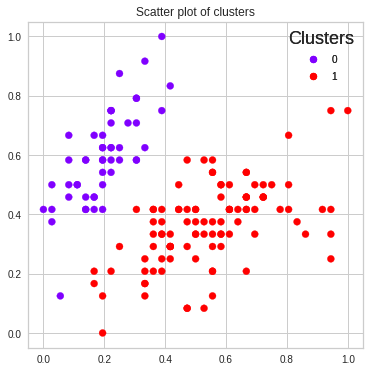

In [90]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train_normalized[:,0], X_train_normalized[:,1], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()

In [91]:
model1_A = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model1_B = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model1_C = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model1_D = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='average',distance_threshold=0.05)
model1_E = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average',distance_threshold=0.7)
model1_F = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.3)
model1_G = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=1)
model1_H = AgglomerativeClustering(n_clusters=None,affinity='cosine', linkage='average',distance_threshold=0.01)


clus_A = model1_A.fit(X_train_normalized)
clus_B = model1_B.fit(X_train_normalized)
clus_C = model1_C.fit(X_train_normalized)
clus_D = model1_D.fit(X_train_normalized)
clus_E = model1_E.fit(X_train_normalized)
clus_F = model1_F.fit(X_train_normalized)
clus_G= model1_F.fit(X_train)
clus_H= model1_F.fit(X_train)


In [92]:
print('Output Clusters from model A are')
pred1 = clus_A.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))
# Silhouette Score
print('Silhouette Score for model A')
print(silhouette_score(X_train,pred1))

Output Clusters from model A are
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
{0: 100, 1: 50}
Silhouette Score for model A
0.6867350732769777


## Customer dataset
Repeat all the above on the customer data set 

In [93]:
customer_df=pd.read_csv('Customer data.csv')
customer_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [94]:
X_train=customer_df.iloc[:,[1,2,3,4,5,6,7]].values  


In [95]:
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
print(X_train[0:5])
print(X_train_normalized[0:5])

[[     0      0     67      2 124670      1      2]
 [     1      1     22      1 150773      1      2]
 [     0      0     49      1  89210      0      0]
 [     0      0     45      1 171565      1      1]
 [     0      0     53      1 149031      1      1]]
[[0.         0.         0.84482759 0.66666667 0.32478101 0.5
  1.        ]
 [1.         1.         0.06896552 0.33333333 0.42021043 0.5
  1.        ]
 [0.         0.         0.53448276 0.33333333 0.19514353 0.
  0.        ]
 [0.         0.         0.46551724 0.33333333 0.49622348 0.5
  0.5       ]
 [0.         0.         0.60344828 0.33333333 0.41384189 0.5
  0.5       ]]


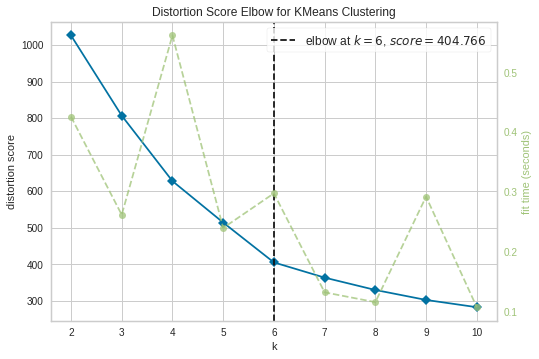

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [96]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

model = KMeans()

elb_visualizer = KElbowVisualizer(model, k=(2,11))
elb_visualizer.fit(X_train_normalized)    
elb_visualizer.show()  

silhouette_scores [0.3908135700315586, 0.3569135304337949, 0.4023684317095256, 0.4224716320686519] 
 k_values [2, 3, 4, 5]


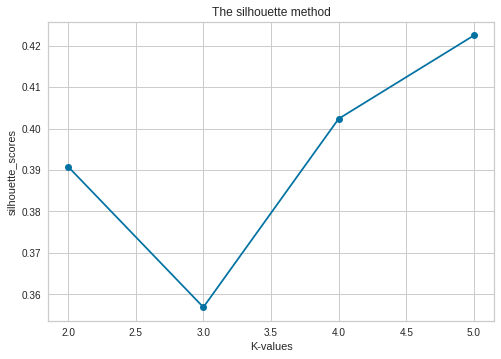

In [97]:
def find_best_clusters(df, maximum_K):
    
    silhouette_scores = []
    k_values = []
    for k in range(2, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        silhouette_scores_values = silhouette_score(df, kmeans_model.labels_, metric='euclidean')
        silhouette_scores.append(silhouette_scores_values)
        k_values.append(k)
    
    return silhouette_scores,k_values
silhouette_scores, k_values=find_best_clusters(X_train_normalized,6)
print('silhouette_scores', silhouette_scores,'\n','k_values',k_values)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('The silhouette method')
plt.xlabel("K-values")
plt.ylabel("silhouette_scores")
plt.show()

Text(0, 0.5, 'Euclidean distance in the space with other variables')

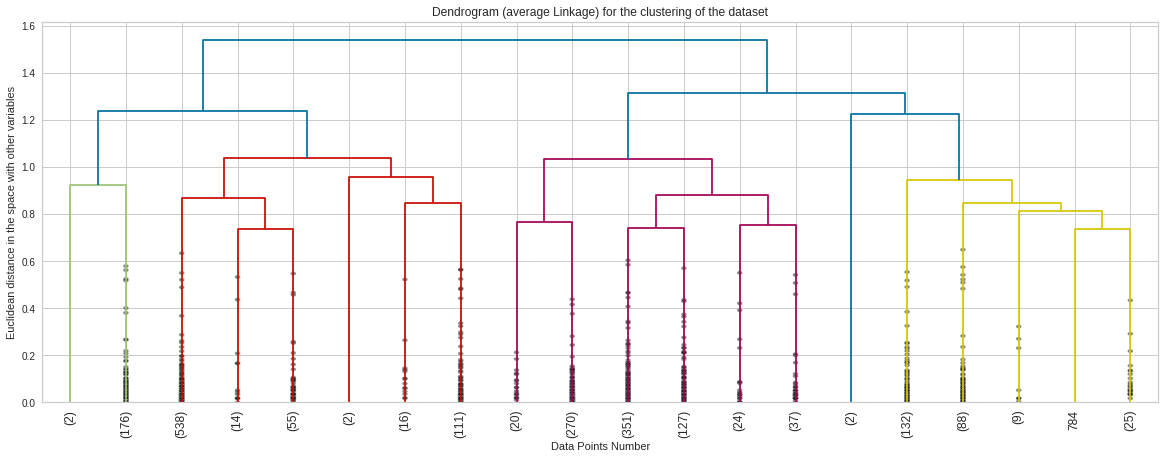

In [98]:
# Dendrogram (Average Linkage) 

Z = sch.linkage(X_train_normalized, method = 'average')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z,truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters, lower it if interested seeing how balanced the solution is
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True)
plt.title('Dendrogram (average Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

In [99]:
# Building an Agglomerative Clustering Model

cluster_H = AgglomerativeClustering(n_clusters=2,linkage = 'average')
model_clt = cluster_H.fit(X_train_normalized)
print('Output Clusters are')
pred1 = model_clt.labels_
print(pred1)
# Frequency count of the Output clusters
unique, counts = np.unique(pred1, return_counts=True)
print(dict(zip(unique, counts)))

Output Clusters are
[0 1 0 ... 0 1 0]
{0: 1086, 1: 914}


In [100]:
# Silhouette Score
print('Silhouette Score for 2 Clusters')
print(silhouette_score(X_train_normalized,pred1))

Silhouette Score for 2 Clusters
0.3908135700315586


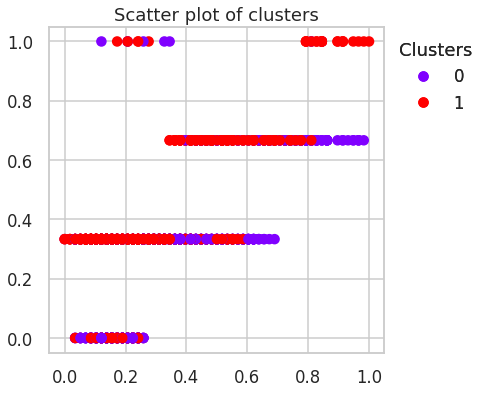

In [113]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X_train_normalized[:,2], X_train_normalized[:,3], c=pred1, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()